<a href="https://colab.research.google.com/github/panitavan/LE202/blob/main/Copy_of_Copy_of_LE380_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# โครงงาน #1 รวมรวม บันทึก และแสดงข้อมูลสภาพแวดล้อม

1.   เชื่อมต่อ MQTT กับเซ็นเซอร์ AIS NB-IoT Devkit ที่ห้อง 412/1 ตึกวิจัย 
2.   บันทึกเข้าฐานข้อมูล SQLite
3.   แสดงกราฟของข้อมูล

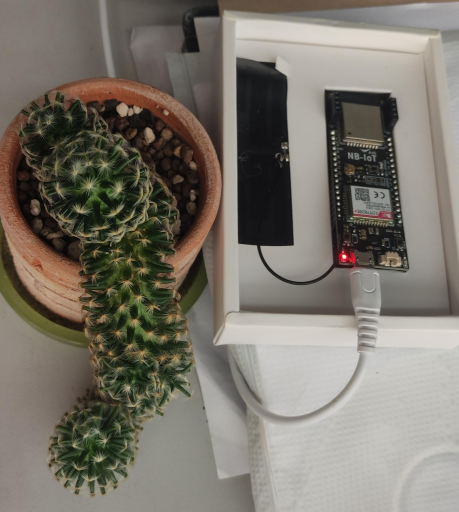

## 1.1 ฟังก์ชันสำหรับเชื่อมต่อ MQTT
[Paho MQTT](https://pypi.org/project/paho-mqtt/)

## 1.2 ฟังก์ชันสำหรับฐานข้อมูล
[sqlite3 — DB-API 2.0 interface for SQLite databases](https://docs.python.org/3/library/sqlite3.html)

## 1.3 ฟังก์ชันสำหรับนำเข้าข้อมูล
[sqlite3 — DB-API 2.0 interface for SQLite databases](https://docs.python.org/3/library/sqlite3.html)

## 1.4 ฟังก์ชันสำหรับแสดงข้อมูล
[matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## 1.5 ส่วน runtime

# โครงงาน #2 การประมวลผลข้อมูลด้วย Pandas

1.   นำเข้าข้อมูลจาก SQLite
2.   ประมวลผลข้อมูล


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime, timedelta

## 2.1 นำเข้าข้อมูลจากฐานข้อมูล

In [ ]:
# เชื่อมต่อฐานข้อมูลและนำเข้าข้อมูลเป็น DataFrame


In [ ]:
# สถานะอุณหภูมิ


In [ ]:
# สถานะความชื้น


In [ ]:
# สถานะแสง


##2.2 คัดเลือกข้อมูล

In [ ]:
# เลือกข้อมูลช่วงแรก 1 นาที


In [ ]:
# เลือกข้อมูลด้วยเงื่อนไข


In [ ]:
# หาจุดเริ่มต้นของการทำความเย็นจากอุณหภูมิลดลง


##2.3 ประมวลผลข้อมูล

In [ ]:
# ใช้ moving average


In [ ]:
# หาค่าเฉลี่ยอุณหภูมิใน 1 นาที


In [ ]:
# หาจุดต่ำสุด/สูงสุด = การสวิงของอุณหภูมิ
from scipy.signal import argrelextrema
import numpy as np


# โครงงาน #3 การใช้ scikit learn เพื่อหาความสัมพันธ์

1.   เตรียมข้อมูล
2.   train model
3.   ประเมินความถูกต้อง



##3.1 เตรียมชุดข้อมูล

In [ ]:
# เชื่อมต่อฐานข้อมูลและนำเข้าข้อมูลเป็น DataFrame


In [ ]:
# แสดงแนวโน้มของ temperature และ humidity


In [ ]:
# ยุบรวมชุดข้อมูล temperature และ humidity ทุก 1 นาที


In [ ]:
# คัดเลือกข้อมูลเฉพาะช่วงทำความเย็น


In [ ]:
# เตรียมชุดข้อมูล


##3.2 train model
[Supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

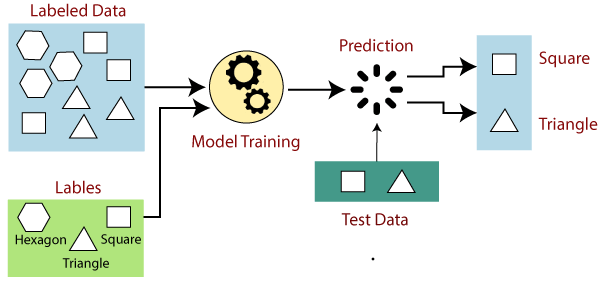

In [ ]:
# สร้าง model แบบ linear model


In [ ]:
# สร้าง model แบบ support vector machine


##3.3 ประเมินความถูกต้อง
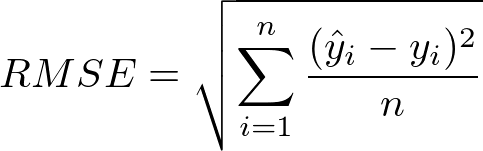

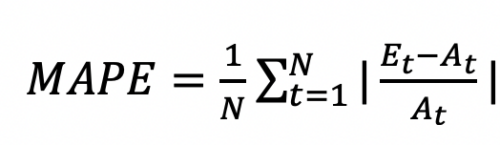

In [ ]:
# ประเมินความถูกต้อง


# โครงงาน #4 การพยากรณ์แนวโน้มข้อมูล

1.   เตรียมชุดข้อมูล
2.   train model
3.   ประเมินความถูกต้อง



In [ ]:
# หลังติดตั้ง ให้ restart runtime 1 ครั้ง
!pip install --quiet --upgrade xlrd
!pip install --quiet prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

##4.1 เตรียมชุดข้อมูล

In [ ]:
# ดาวน์โหลดไฟล์และนำเข้าข้อมูลเป็น list ของ DataFrame
from urllib.request import urlopen
from urllib.parse import urlsplit
import time

def download_data():
  url = 'http://peaoc.pea.co.th/loadprofile/files/07/dt07210111.xls' # 07 กฟก.1 21 ปี 2564 01 มกราคม 11 ที่พักอาศัย > 150 หน่วย
  df = pd.read_excel(url, sheet_name='Source', header=4)
  return df

# ทดสอบ
df = download_data()
df

,TIME,PEAKDAY,WORKDAY,SATURDAY,SUNDAY,HOLIDAY
0,00:00,NaN,NaN,NaN,NaN,NaN
1,00:15,472376.33,391917.2265,421712.434,362520.424000,356935.450
2,00:30,403015.61,379832.6275,410197.292,369369.384000,348490.750
3,00:45,392961.30,379997.7685,410014.298,364524.302000,392439.720
4,01:00,374908.66,368682.3960,384492.168,361296.088000,400174.790
...,...,...,...,...,...,...
92,23:00,510263.10,436054.7275,432293.168,425691.152000,329248.720
93,23:15,496528.55,436462.4240,389192.802,441985.598000,353938.390
94,23:30,506032.42,425888.0640,399662.228,410867.952000,319188.760
95,23:45,455996.20,409392.9925,406677.602,412393.768000,327377.910


In [ ]:
# ทำความสะอาดข้อมูล
def clean_data(df):
  df.iloc[0:96,1:] = df.iloc[1:97,1:]
  df.drop(96,inplace=True)
  df.iloc[95,1:] = df.iloc[94,1:]

clean_data(df)
df

,TIME,PEAKDAY,WORKDAY,SATURDAY,SUNDAY,HOLIDAY
0,00:00,472376.33,391917.2265,421712.434,362520.424,356935.45
1,00:15,403015.61,379832.6275,410197.292,369369.384,348490.75
2,00:30,392961.30,379997.7685,410014.298,364524.302,392439.72
3,00:45,374908.66,368682.3960,384492.168,361296.088,400174.79
4,01:00,379184.00,363207.3170,384225.444,354155.352,327441.65
...,...,...,...,...,...,...
91,22:45,510263.10,436054.7275,432293.168,425691.152,329248.72
92,23:00,496528.55,436462.4240,389192.802,441985.598,353938.39
93,23:15,506032.42,425888.0640,399662.228,410867.952,319188.76
94,23:30,455996.20,409392.9925,406677.602,412393.768,327377.91


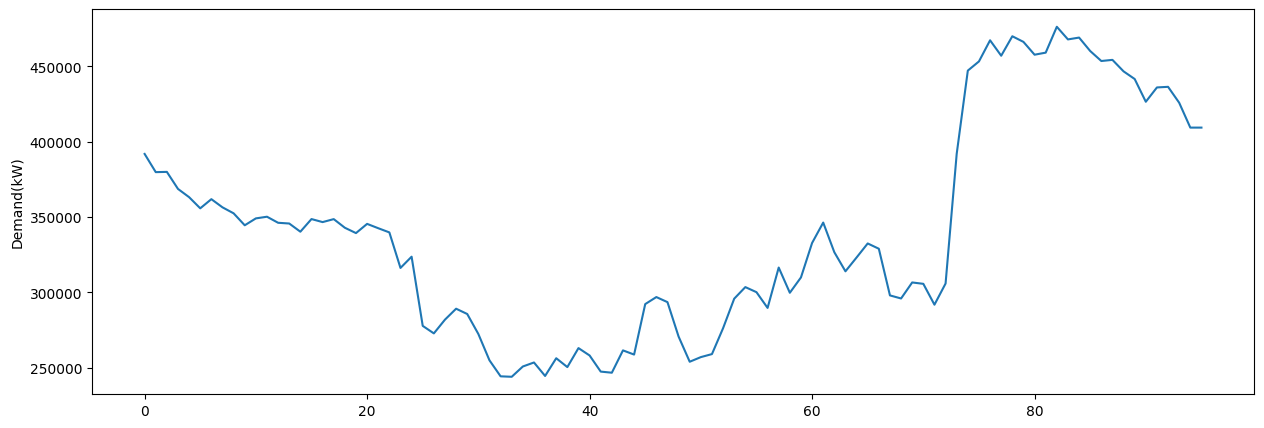

In [ ]:
# แสดงแนวโม้นของ WORKDAY
plt.plot(df.WORKDAY)
plt.ylabel('Demand(kW)')
plt.show()

In [ ]:
# เปลี่ยนคอลัมน์เวลาเป็น datetime ตั้งเป็น index สำหรับข้อมูลวันทำงาน 3 วัน
def gen_train_data(df):
  df_list = []
  for i in range(1,4):
    t = pd.date_range(datetime(2021,1,i,0,0,0), periods=96, freq='15 min')
    df_tmp = df.copy()
    df_tmp.TIME = t
    df_tmp.set_index('TIME', inplace=True)
    df_list.append(df_tmp)
  df_3days = pd.concat(df_list)
  return df_3days

# ทดสอบ
train_df = gen_train_data(df)
train_df

,PEAKDAY,WORKDAY,SATURDAY,SUNDAY,HOLIDAY
TIME,,,,,
2021-01-01 00:00:00,472376.33,391917.2265,421712.434,362520.424,356935.45
2021-01-01 00:15:00,403015.61,379832.6275,410197.292,369369.384,348490.75
2021-01-01 00:30:00,392961.30,379997.7685,410014.298,364524.302,392439.72
2021-01-01 00:45:00,374908.66,368682.3960,384492.168,361296.088,400174.79
2021-01-01 01:00:00,379184.00,363207.3170,384225.444,354155.352,327441.65
...,...,...,...,...,...
2021-01-03 22:45:00,510263.10,436054.7275,432293.168,425691.152,329248.72
2021-01-03 23:00:00,496528.55,436462.4240,389192.802,441985.598,353938.39
2021-01-03 23:15:00,506032.42,425888.0640,399662.228,410867.952,319188.76


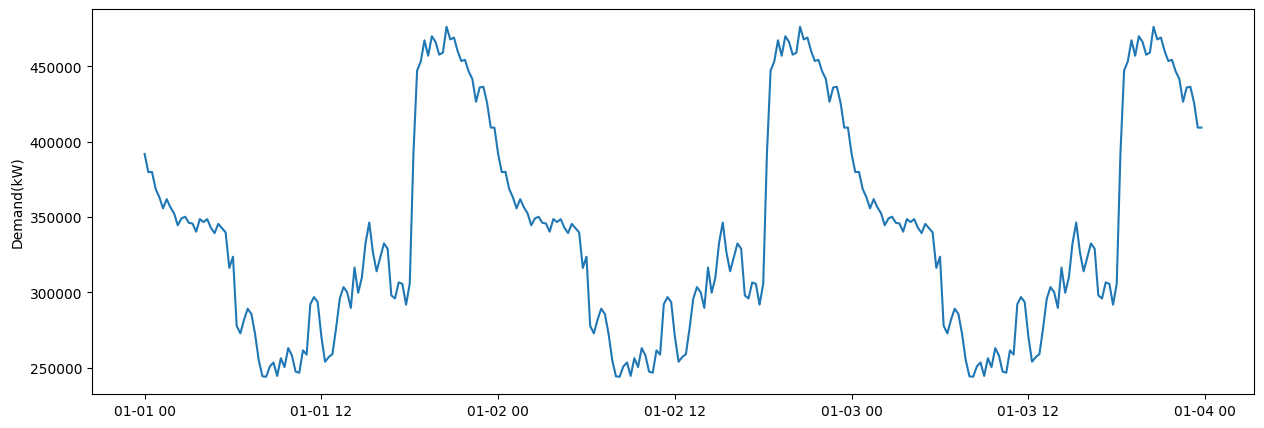

In [ ]:
# วาดกราฟ
plt.rcParams['figure.figsize'] = (15,5) #ขอรูปที่เป็นแนวนอนสัดส่วนยาว 15 นิ้ว สูง 5 นิ้ว
plt.plot(train_df.WORKDAY)
plt.ylabel('Demand(kW)')
plt.show()

In [ ]:
# เตรียมชุดข้อมูล
dataset = train_df.reset_index()
dataset.rename(columns={'TIME':'ds','WORKDAY': 'Y'}, inplace=True) 
dataset

,ds,PEAKDAY,Y,SATURDAY,SUNDAY,HOLIDAY
0,2021-01-01 00:00:00,472376.33,391917.2265,421712.434,362520.424,356935.45
1,2021-01-01 00:15:00,403015.61,379832.6275,410197.292,369369.384,348490.75
2,2021-01-01 00:30:00,392961.30,379997.7685,410014.298,364524.302,392439.72
3,2021-01-01 00:45:00,374908.66,368682.3960,384492.168,361296.088,400174.79
4,2021-01-01 01:00:00,379184.00,363207.3170,384225.444,354155.352,327441.65
...,...,...,...,...,...,...
283,2021-01-03 22:45:00,510263.10,436054.7275,432293.168,425691.152,329248.72
284,2021-01-03 23:00:00,496528.55,436462.4240,389192.802,441985.598,353938.39
285,2021-01-03 23:15:00,506032.42,425888.0640,399662.228,410867.952,319188.76
286,2021-01-03 23:30:00,455996.20,409392.9925,406677.602,412393.768,327377.91


##4.2 train model
[Phophet Quick Start](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [ ]:
# สร้าง model โดยปล่อยให้ Prophet จัดการ
from prophet import Prophet

pp_model = Prophet()
pp_model.fit(dataset)

NameError: ignored

##4.3 train model
[statsmodels Getting started](https://www.statsmodels.org/stable/gettingstarted.html)

In [ ]:
# พยากรณ์ข้อมูลในอนาคต
future = pp_model.make_future_dataframe(periods=96, freg = '15MIN') # สร้างเวลาล่วงหน้า
forecast = pp_model.predict(future)
forecast

TypeError: ignored

##4.4 ประเมินความถูกต้อง

In [ ]:
# ประเมินความสามารถในการพยากรณ์
fig = pp_model.plot(forecast)

NameError: ignored